In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import plotly.express as px

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (48.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and di

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# colab

resident = pd.read_csv("/content/gdrive/My Drive/project/CARD_SPENDING_RESIDENT.txt",sep='\t',encoding='CP949')
foreigner = pd.read_csv("/content/gdrive/My Drive/project/CARD_SPENDING_FOREIGNER.txt",sep='\t',encoding='CP949')

In [ ]:
# jupyter
resident = pd.read_csv("CARD_SPENDING_RESIDENT.txt",sep='\t',encoding='CP949')
foreigner = pd.read_csv("CARD_SPENDING_FOREIGNER.txt",sep='\t',encoding='CP949')

In [ ]:
# 연령별 소비데이터 분석 및 시각화
dong = pd.read_excel("/content/gdrive/My Drive/BigCon_BiKong/Data(given)/02_카드매출데이터(신한카드)_하은/02_혁신아이디어분야_카드소비데이터(신한카드)_데이터정의서.xlsx",encoding='cp494',sheet_name='(참고) 행정동코드', skiprows=1,skipcols=1)
business = pd.read_excel("/content/gdrive/My Drive/BigCon_BiKong/Data(given)/02_카드매출데이터(신한카드)_하은/02_혁신아이디어분야_카드소비데이터(신한카드)_데이터정의서.xlsx",encoding='cp494',sheet_name='(참고) 업종코드', skiprows=1,skipcols=1)

dong_cd = dong[['구코드', '행정동코드', '구명', '행정동명']]
dong_cd2=dong_cd.set_index('구코드')

### resident column
- STD_DD : 기준일자
- GU_CD : 구코드
- DONG_CD : 행정동코드
- MCT_CAT_CD : 업종코드
- SEX_CD : 성별코드
- AGE_CD : 나이코드
- USE_CNT : 이용건수
- USE_AMT : 이용금액 (천원)

- 140 : 중구(서울)
- 350 : 노원구(서울)
- 260 : 수성구(대구)
- 110 : 중구(대구)

In [ ]:
dong_cd

,구코드,행정동코드,구명,행정동명
0,140,520,서울 중구,소공동
1,140,540,서울 중구,회현동
2,140,550,서울 중구,명동
3,140,570,서울 중구,필동
4,140,580,서울 중구,장충동
...,...,...,...,...
64,110,650,대구 중구,남산2동
65,110,660,대구 중구,남산3동
66,110,670,대구 중구,남산4동
67,110,680,대구 중구,대봉1동


In [ ]:
# 연령/업종/구 별 이용대금 합계 grouping - 내국인
resident_group = resident.groupby(['AGE_CD','MCT_CAT_CD','GU_CD']).sum().reset_index()
resident_group 

,AGE_CD,MCT_CAT_CD,GU_CD,USE_CNT,USE_AMT
0,20,10,110,10502,432494
1,20,10,140,23306,1617073
2,20,10,260,6505,343854
3,20,10,350,17562,650352
4,20,20,110,36353,2100648
...,...,...,...,...,...
915,65,81,350,249024,5232315
916,65,92,110,1263,83625
917,65,92,140,3830,218679
918,65,92,260,8310,341285


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



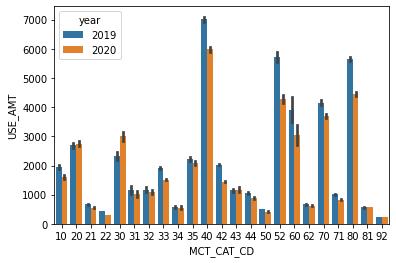

In [ ]:
# 업종별 2019/2020 금액 비교
p = sns.barplot(data=resident, x='MCT_CAT_CD',y='USE_AMT', hue="year")


In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go


In [ ]:
# 내국인/외국인 연도별로 자르기
foreigner_2020 = foreigner[foreigner['year']=='2020']
foreigner_2019 = foreigner[foreigner['year']=='2019']
resident_2019 = resident[resident['year']=='2019']
resident_2020 = resident[resident['year']=='2020']

### 연도별 이용대금 비교

In [ ]:
# 업종별/나이별 2019 이용대금
a = resident_2019.groupby(['업종','AGE_CD']).sum()
a.rename(columns={'USE_CNT': '이용건수19', 'USE_AMT': '이용금액19'},inplace=True)
a

이용건수19   이용금액19
업종 AGE_CD                 
가구 20         553    41055
   25        1558   266604
   30        1704   652525
   35        1771   821415
   40        2259  1014373
...           ...      ...
직물 45        7289  1042532
   50        8155  1305821
   55        8468  1717445
   60        6947   965946
   65        8610  1311060

[230 rows x 2 columns]

In [ ]:
# 업종별/나이별 2020 이용대금
b = resident_2020.groupby(['업종','AGE_CD']).sum()
b.rename(columns={'USE_CNT': '이용건수20', 'USE_AMT': '이용금액20'},inplace=True)
b

이용건수20   이용금액20
업종 AGE_CD                 
가구 20         240    33340
   25        1156   333598
   30        1431   872445
   35        1667  1027099
   40        1809  1261838
...           ...      ...
직물 45        5668  1015511
   50        6845  1406118
   55        7895  1200026
   60        7399   995644
   65        8447  1187616

[230 rows x 2 columns]

In [ ]:
c = pd.concat([a,b],axis=1)
c

이용건수19   이용금액19  이용건수20   이용금액20
업종 AGE_CD                                  
가구 20         553    41055     240    33340
   25        1558   266604    1156   333598
   30        1704   652525    1431   872445
   35        1771   821415    1667  1027099
   40        2259  1014373    1809  1261838
...           ...      ...     ...      ...
직물 45        7289  1042532    5668  1015511
   50        8155  1305821    6845  1406118
   55        8468  1717445    7895  1200026
   60        6947   965946    7399   995644
   65        8610  1311060    8447  1187616

[230 rows x 4 columns]


 성별구분 / 월별 구분 추가 요망 ..
 오늘 오후에 할 예정임 ㅎ
 

In [ ]:
# 업종별 연도 차액 비교
c['금액차이'] = c['이용금액19']-c['이용금액20']
c['건수차이'] = c['이용건수19']-c['이용건수20']
c

이용건수19   이용금액19  이용건수20   이용금액20    금액차이  건수차이
업종 AGE_CD                                                
가구 20         553    41055     240    33340    7715   313
   25        1558   266604    1156   333598  -66994   402
   30        1704   652525    1431   872445 -219920   273
   35        1771   821415    1667  1027099 -205684   104
   40        2259  1014373    1809  1261838 -247465   450
...           ...      ...     ...      ...     ...   ...
직물 45        7289  1042532    5668  1015511   27021  1621
   50        8155  1305821    6845  1406118 -100297  1310
   55        8468  1717445    7895  1200026  517419   573
   60        6947   965946    7399   995644  -29698  -452
   65        8610  1311060    8447  1187616  123444   163

[230 rows x 6 columns]

In [ ]:
c[c['금액차이']<0]

이용건수19    이용금액19  이용건수20    이용금액20     금액차이    건수차이
MCT_CAT_CD AGE_CD                                                     
30         25        1558    266604    1156    333598   -66994     402
           30        1704    652525    1431    872445  -219920     273
           35        1771    821415    1667   1027099  -205684     104
           40        2259   1014373    1809   1261838  -247465     450
           45        2874   1006089    2082   1025735   -19646     792
           50        2795   1182008    2420   1379912  -197904     375
           60        1314    645528    1521    826549  -181021    -207
           65        1553    652959    1964    749852   -96893    -411
31         20          38      2339      37      4452    -2113       1
           35         281     71155     478     75707    -4552    -197
           40         410     81848     494    108642   -26794     -84
           45         661    122453     653    171099   -48646       8
           50         692    170537     721    173240    -2703     -29
           60         587    119034     710    137313   -18279    -123
           65         829    226268     973    228174    -1906    -144
32         60        7624   1032930    7928   1160533  -127603    -304
           65        8290    900508    9170    990537   -90029    -880
34         55        6563    647392    4394    716884   -69492    2169
43         40        4908    564445    3948    635060   -70615     960
           50        8155   1305821    6845   1406118  -100297    1310
           60        6947    965946    7399    995644   -29698    -452
60         25        1839    583938    1838    706089  -122151       1
           30        2269   1245238    2341   1257004   -11766     -72
           50        2585   1516714    2699   1925654  -408940    -114
           65        1087    433201    1260    572059  -138858    -173
70         25      740353  32702896  862737  33378868  -675972 -122384
81         40      663897   9660306  631788  10005302  -344996   32109
           45      790559  11866025  747974  12282602  -416577   42585
           50      648262  11452337  699812  12606177 -1153840  -51550
           55      472357   9297069  508764   9794785  -497716  -36407
           60      322089   7347545  372429   8043822  -696277  -50340
           65      357265   9019479  452636  10731136 -1711657  -95371
92         25       23277    512241   24932    583827   -71586   -1655
           30       25880    698449   23344    728185   -29736    2536
           50       43235   1269583   42628   1380614  -111031     607
           65       11104    462221   12130    581011  -118790   -1026

In [ ]:
# 연령별 소비데이터 분석 및 시각화
dong = pd.read_excel("/content/gdrive/My Drive/BigCon_BiKong/Data(given)/02_카드매출데이터(신한카드)_하은/02_혁신아이디어분야_카드소비데이터(신한카드)_데이터정의서.xlsx",encoding='cp494',sheet_name='(참고) 행정동코드', skiprows=1,skipcols=1)
business = pd.read_excel("/content/gdrive/My Drive/BigCon_BiKong/Data(given)/02_카드매출데이터(신한카드)_하은/02_혁신아이디어분야_카드소비데이터(신한카드)_데이터정의서.xlsx",encoding='cp494',sheet_name='(참고) 업종코드', skiprows=1,skipcols=1)

dong_cd = dong[['구코드', '행정동코드', '구명', '행정동명']]
dong_cd2=dong_cd.set_index('구코드')
 

In [ ]:
business_cd = business[['업종코드 (32개 분류)', '세부 업종코드']]
business_cd = business_cd.fillna(method='pad')
business_cd = business_cd.dropna()

In [ ]:
business_cd['code'] = business_cd['업종코드 (32개 분류)'].str[-3:-1]
business_cd

,업종코드 (32개 분류),세부 업종코드,code
1,숙박(10),특급 호텔,10
2,숙박(10),1급 호텔,10
3,숙박(10),2급 호텔,10
4,숙박(10),콘도미니엄,10
5,숙박(10),"모텔,여관,기타숙박",10
...,...,...,...
161,음료식품(81),인삼 및 건강제품,81
162,수리서비스(92),각종 수리점,92
163,수리서비스(92),"열쇠,도장",92
164,수리서비스(92),휴대폰수리,92


DataFrame.values = numpy.ndarray 형태로 모든 열을 반환해줌

* map 함수 : map(function,**iterable)
- in numpy , 1차원 원소별 적용
- Return to list

* map method : data.map(func,**iterable)
- in Pandas , 1차원 원소별 적용
- Return to Series

In [ ]:
resident.columns

Index(['STD_DD', 'GU_CD', 'DONG_CD', 'MCT_CAT_CD', 'SEX_CD', 'AGE_CD',
       'USE_CNT', 'USE_AMT', 'year_month', 'month', 'year', 'city', '지구'],
      dtype='object')

In [ ]:
resident['시_구'] = dong_cd2.index.map(gu_dic)


,행정동코드,구명,행정동명
구코드,,,
140,520,서울 중구,소공동
140,540,서울 중구,회현동
140,550,서울 중구,명동
140,570,서울 중구,필동
140,580,서울 중구,장충동
...,...,...,...
110,650,대구 중구,남산2동
110,660,대구 중구,남산3동
110,670,대구 중구,남산4동


In [ ]:
# # resident = resident.set_index('GU_CD')
# # resident['행정동'] = 
# [gu_dong_dic[(i,x)] for i,x in zip(dong_cd.index, dong_cd['행정동코드'])]
# gu_dong_dic.keys()[0]

In [ ]:
resident.columns

Index(['STD_DD', 'GU_CD', 'DONG_CD', 'MCT_CAT_CD', 'SEX_CD', 'AGE_CD',
       'USE_CNT', 'USE_AMT', 'year_month', 'month', 'year', 'city', '지구', '업종',
       '요일'],
      dtype='object')

In [ ]:
resident_town = resident[['업종','지구','year','USE_CNT']].groupby(['year','지구','업종','year']).sum()
resident_town

USE_CNT
year 지구   업종    year         
2019 상업지구 가구    2019     7315
          가전    2019    59943
          광학제품  2019    70290
          레저업소  2019   751923
          레저용품  2019  1083191
...                       ...
2020 주거지구 자동차정비 2020   197840
          자동차판매 2020     8736
          전기    2020     4156
          주방용구  2020    18702
          직물    2020    10875

[92 rows x 1 columns]

In [ ]:
resident_year = resident[['업종','지구','year','USE_AMT']].groupby(['지구','업종','year']).sum()
resident_year

USE_AMT
지구   업종   year          
상업지구 가구   2019   3427970
          2020   3019251
     가전   2019  16767780
          2020  10684510
     광학제품 2019   6548116
...                  ...
주거지구 전기   2020    723718
     주방용구 2019   2020587
          2020   1738562
     직물   2019   1422768
          2020   1607341

[92 rows x 1 columns]

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<function matplotlib.pyplot.plot>

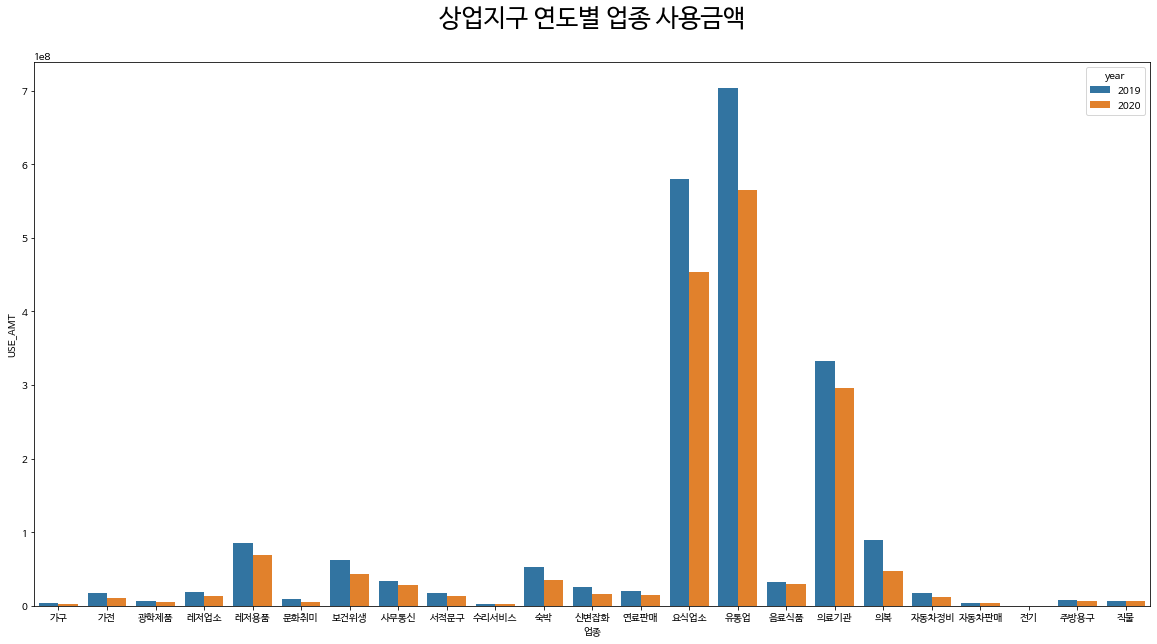

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = [20,10]
g1 = sns.barplot(data = resident_year.loc['상업지구'].reset_index(),x='업종', y='USE_AMT',hue='year', ci=None)
plt.title('상업지구 연도별 업종 사용금액\n', {'fontsize' : 25, 'color':'black'})
plt.plot

<function matplotlib.pyplot.plot>

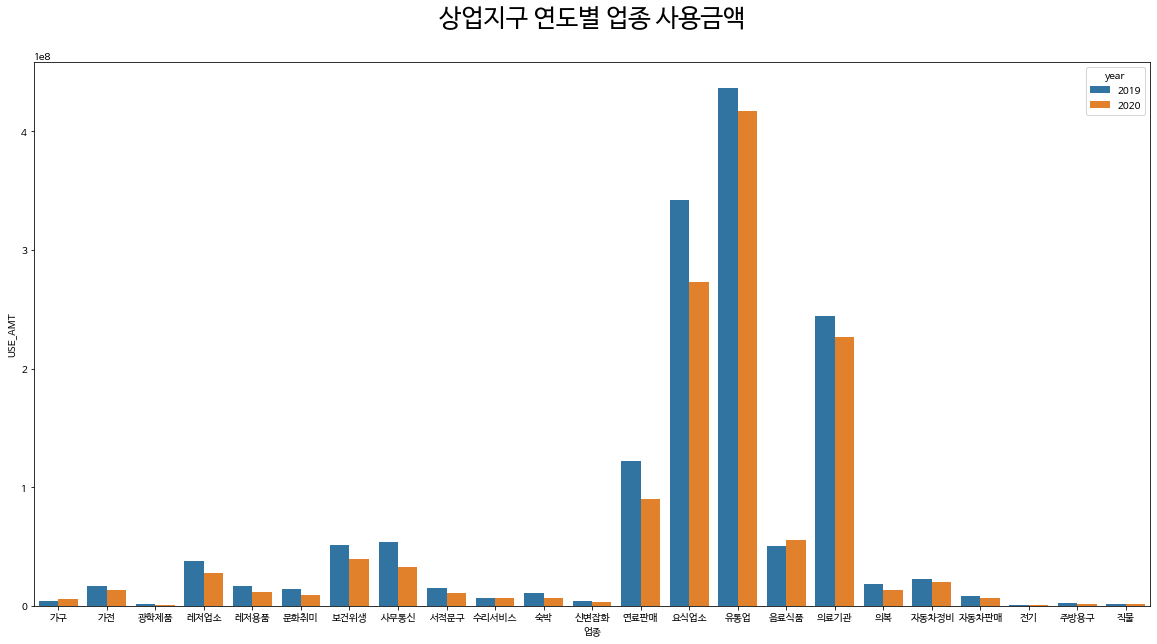

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = [20,10]
g1 = sns.barplot(data = resident_year.loc['주거지구'].reset_index(),x='업종', y='USE_AMT',hue='year', ci=None)
plt.title('상업지구 연도별 업종 사용금액\n', {'fontsize' : 25, 'color':'black'})
plt.plot

# 유흥업은 상업지구에서는 거의 변화하지 않음

<function matplotlib.pyplot.plot>

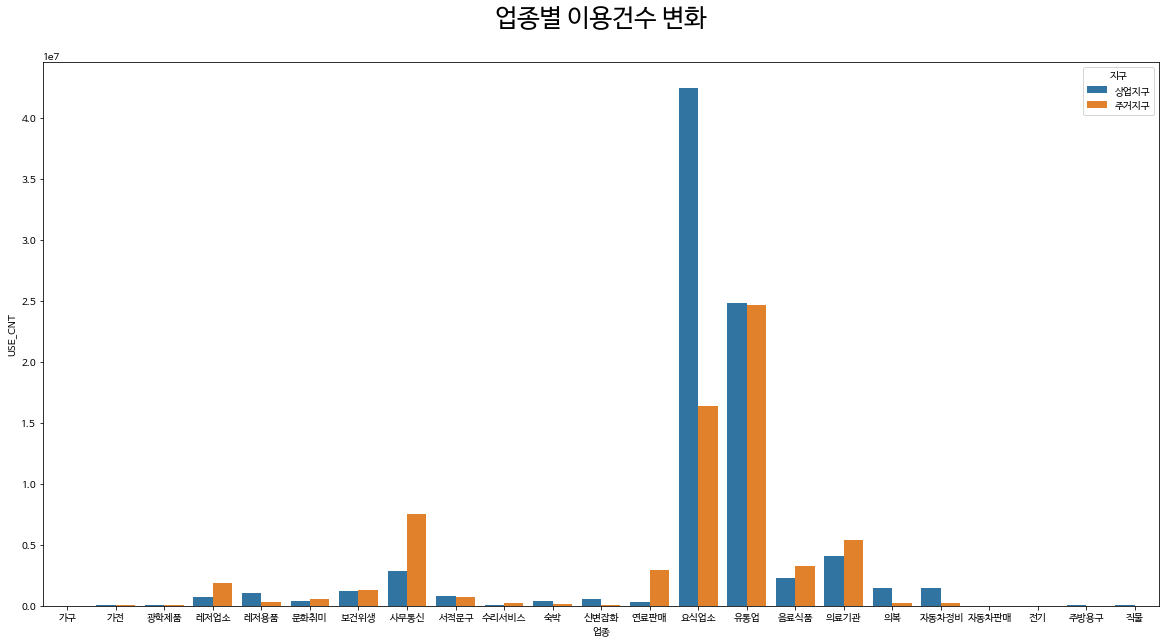

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = [20,10]
g1 = sns.barplot(data = resident_town.loc['2019'].reset_index(),x='업종', y='USE_CNT',hue='지구', ci=None)
plt.title('상업지구 별 업종/이용건수 변화\n', {'fontsize' : 25, 'color':'black'})
plt.plot

<function matplotlib.pyplot.plot>

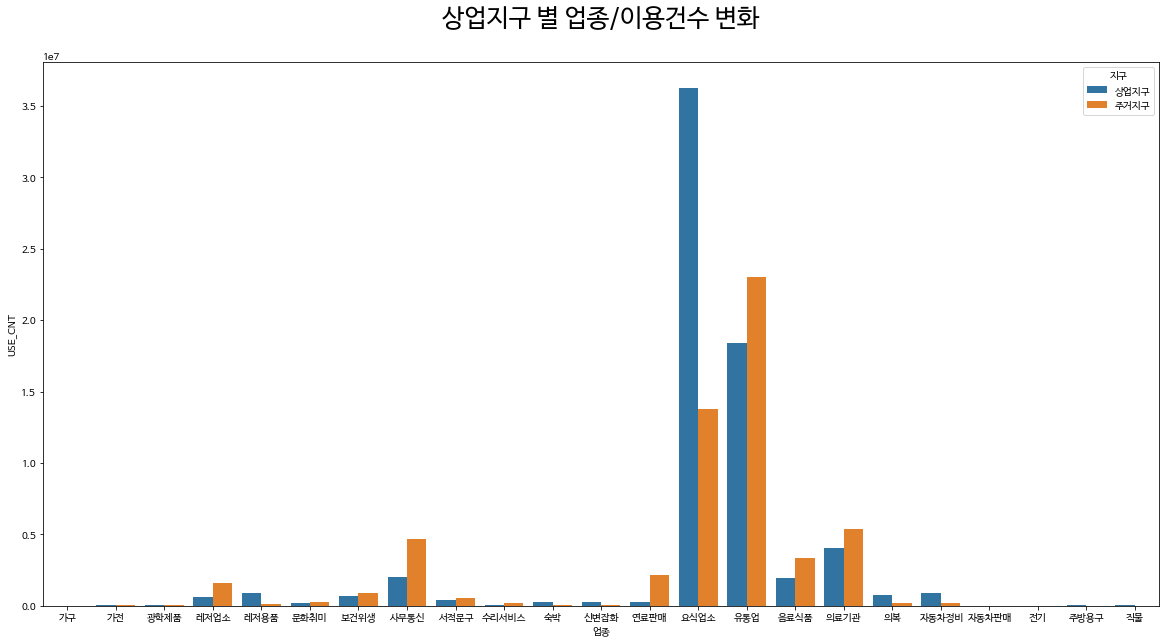

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = [20,10]
g1 = sns.barplot(data = resident_town.loc['2020'].reset_index(),x='업종', y='USE_CNT',hue='지구', ci=None)
plt.title('상업지구 별 업종/이용건수 변화\n', {'fontsize' : 25, 'color':'black'})
plt.plot

In [ ]:
resident.columns

Index(['STD_DD', 'GU_CD', 'DONG_CD', 'MCT_CAT_CD', 'SEX_CD', 'AGE_CD',
       'USE_CNT', 'USE_AMT', 'year_month', 'month', 'year', 'city', '지구', '업종',
       '요일'],
      dtype='object')

In [ ]:
resident_yosik = resident[['업종','지구','year','USE_AMT','AGE_CD']].groupby(['업종','year','AGE_CD','지구']).sum()


<function matplotlib.pyplot.plot>

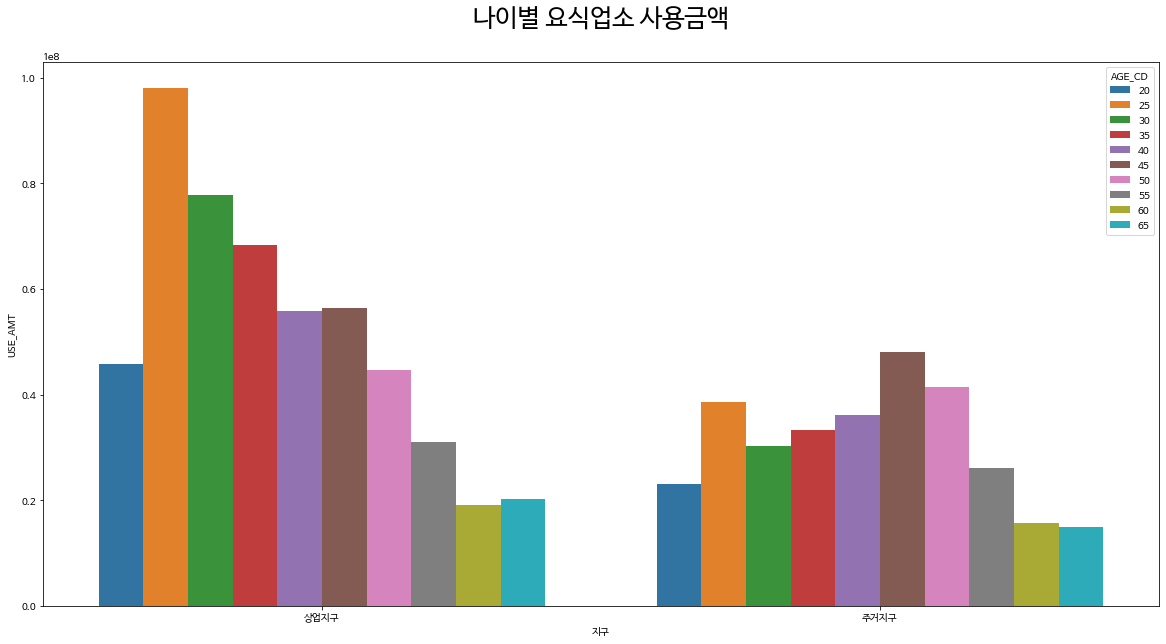

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = [20,10]
g1 = sns.barplot(data = resident_yosik.loc['요식업소'].reset_index(),x='지구', y='USE_AMT',hue='AGE_CD', ci=None)
plt.title('나이별 요식업소 사용금액\n', {'fontsize' : 25, 'color':'black'})
plt.plot

<function matplotlib.pyplot.plot>

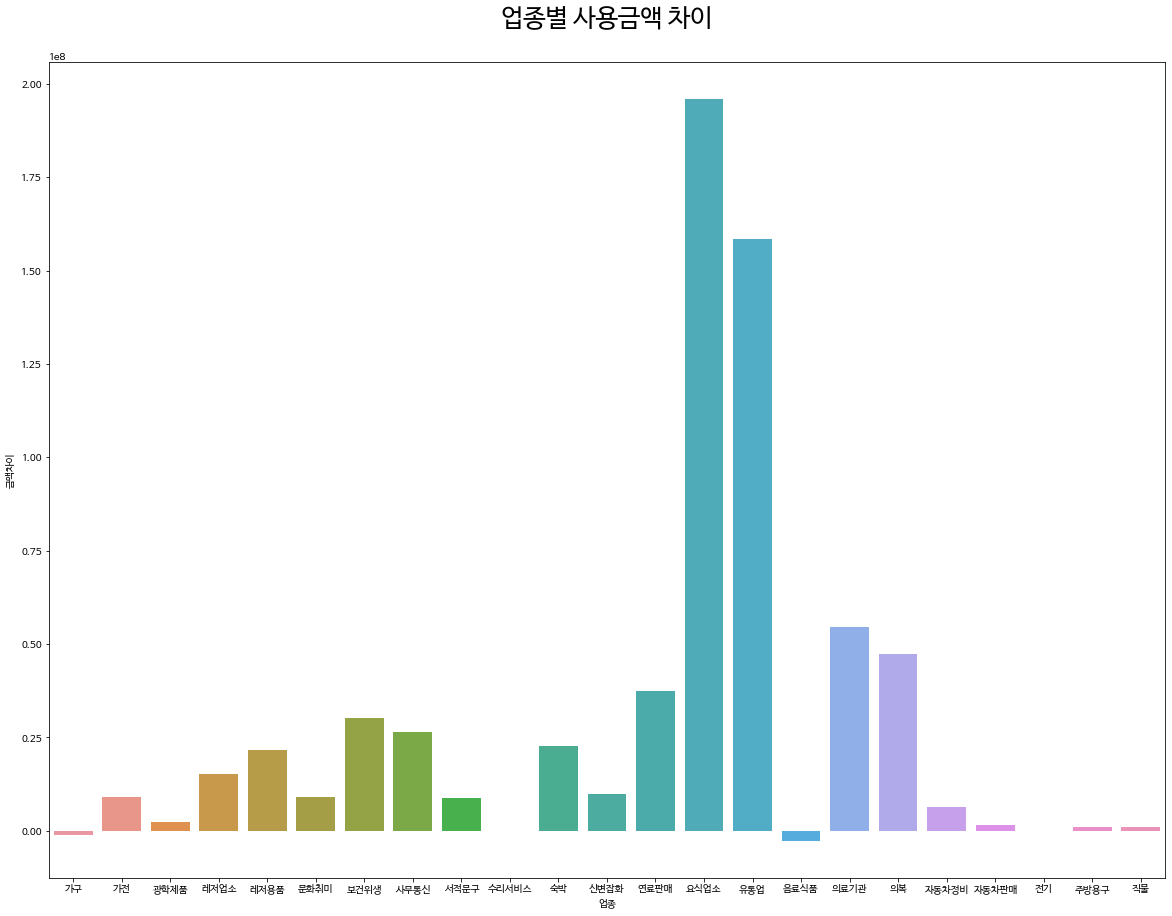

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = [20,15]
g1 = sns.barplot(data = cc,x=cc.index, y='금액차이', ci=None)
plt.title('업종별 사용금액 차이\n', {'fontsize' : 25, 'color':'black'})
plt.plot

<function matplotlib.pyplot.plot>

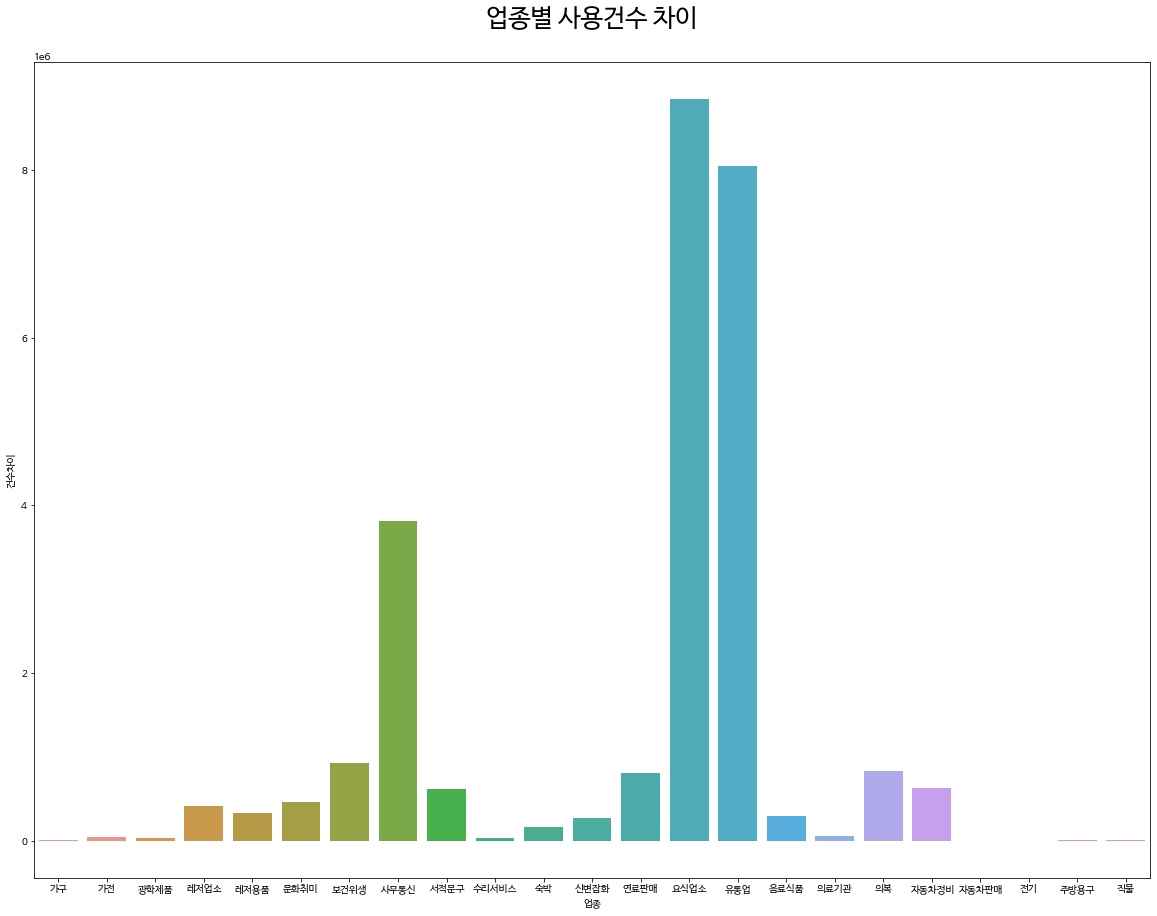

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = [20,15]
g1 = sns.barplot(data = cc,x=cc.index, y='건수차이', ci=None)
plt.title('업종별 사용건수 차이\n', {'fontsize' : 25, 'color':'black'})
plt.plot

In [ ]:
cc

,AGE_CD,이용건수19,이용금액19,AGE_CD,이용건수20,이용금액20,금액차이,건수차이
업종,,,,,,,,
가구,143165,18496,7470184,134370,16333,8679411,-1209227,2163
가전,679795,125404,33357303,539055,85047,24347172,9010131,40357
광학제품,543800,116398,8183860,396340,82366,5784333,2399527,34032
레저업소,3273065,2658105,56179519,2833680,2250509,40987455,15192064,407596
레저용품,1650390,1362051,102633333,1270185,1028462,80888934,21744399,333589
문화취미,2092975,945526,23425696,1860190,479961,14480321,8945375,465565
보건위생,4683335,2541178,112925672,4226025,1617409,82768637,30157035,923769
사무통신,614835,10446174,87365243,585245,6638067,61028395,26336848,3808107
서적문구,2615960,1560222,32779451,2349220,949993,23994170,8785281,610229


In [ ]:
aa = resident_2019.groupby(['업종']).sum()
aa.rename(columns={'USE_CNT': '이용건수19', 'USE_AMT': '이용금액19'},inplace=True)
bb = resident_2020.groupby(['업종']).sum()
bb.rename(columns={'USE_CNT': '이용건수20', 'USE_AMT': '이용금액20'},inplace=True)
cc = pd.concat([aa,bb],axis=1)
cc['금액차이'] = cc['이용금액19']-cc['이용금액20']
cc['건수차이'] = cc['이용건수19']-cc['이용건수20']